### Exercise 07
### The Boltzmann distribution

#### 8.1 Microstates in a 5-level system

In [1]:
import scipy.special
import numpy as np
import random
import matplotlib.pyplot as plt

1. Write a Python-script that generates a series of configurations according to this scheme. In the initial state all particles should be in the second lowest energy level. We do 50000 simulation steps with 50 steps for equilibration.

In [2]:
def simulate(N, count_timesteps):
    c = np.ones(N)
    seconds = count_timesteps
    total_energy = [N]

    e0, e1, e2, e3, e4 = [0], [N], [0], [0], [0]


    for x in range(seconds):

        i = random.randint(0, c.size-1)
        j = random.randint(0, c.size-1)
        while c[i] == 4 or c[j] == 0:
            i = random.randint(0, c.size-1)
            j = random.randint(0, c.size-1)

        if i != j:
            if c[i]<4 and c[j]>0:
                c[i] += 1
                c[j] -= 1

        total_energy.append(np.sum(c))

        e0.append(c.size-np.count_nonzero(c))
        e1.append(np.count_nonzero(c == 1))
        e2.append(np.count_nonzero(c == 2))
        e3.append(np.count_nonzero(c == 3))
        e4.append(np.count_nonzero(c == 4))
    return total_energy, e0, e1, e2, e3, e4

In [3]:
total_energy, e0, e1, e2, e3, e4 = simulate(6, 50050)

In [4]:
# N = 6
# c = np.ones(N)
# seconds = 50050
# total_energy = [N]

# e0, e1, e2, e3, e4 = [0], [N], [0], [0], [0]


# for x in range(seconds):
    
#     i = random.randint(0, c.size-1)
#     j = random.randint(0, c.size-1)
#     while c[i] == 4 or c[j] == 0:
#         i = random.randint(0, c.size-1)
#         j = random.randint(0, c.size-1)
    
#     if i != j:
#         if c[i]<4 and c[j]>0:
#             c[i] += 1
#             c[j] -= 1
    
#     total_energy.append(np.sum(c))
    
#     e0.append(c.size-np.count_nonzero(c))
#     e1.append(np.count_nonzero(c == 1))
#     e2.append(np.count_nonzero(c == 2))
#     e3.append(np.count_nonzero(c == 3))
#     e4.append(np.count_nonzero(c == 4))

2. Plot the total energy of the system as a function of time

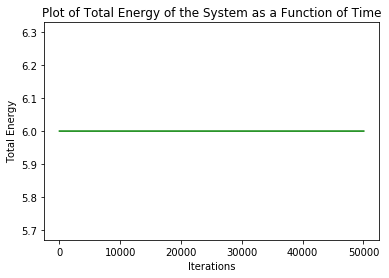

In [5]:
plt.plot(total_energy, color="g")
plt.xlabel("Iterations")
plt.ylabel("Total Energy")
plt.title("Plot of Total Energy of the System as a Function of Time")
plt.show()

3. Plot the population of the energy levels as function of time

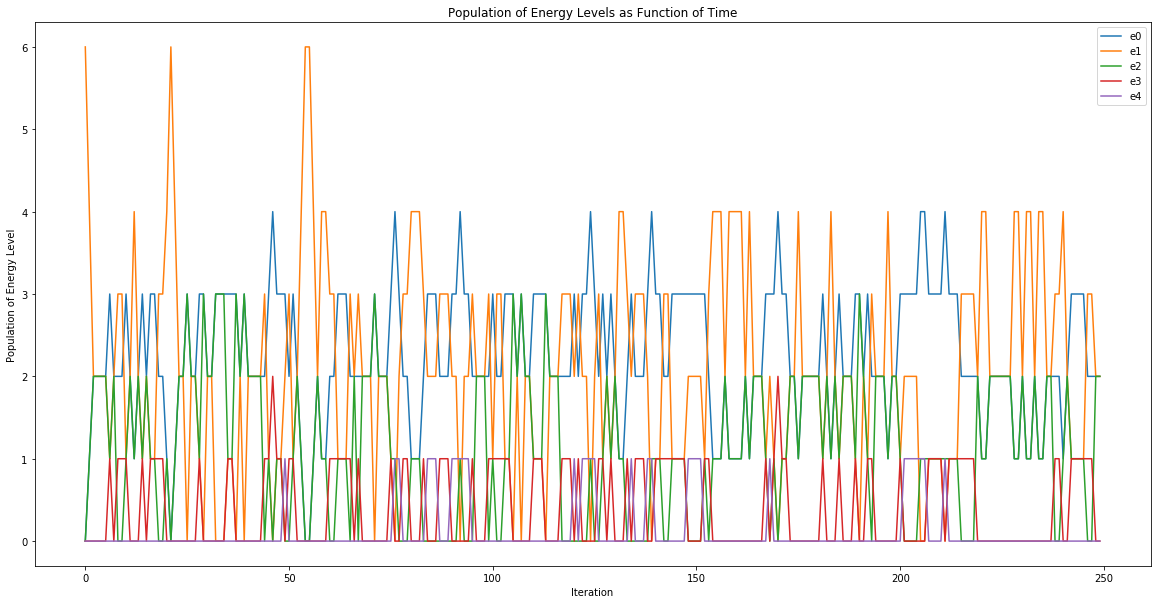

In [6]:
fig = plt.figure(figsize=(20, 10))
highest_time_to_plot = 250
plt.plot(e0[:highest_time_to_plot], label = 'e0')
plt.plot(e1[:highest_time_to_plot],label = 'e1')
plt.plot(e2[:highest_time_to_plot],label = 'e2')
plt.plot(e3[:highest_time_to_plot],label = 'e3')
plt.plot(e4[:highest_time_to_plot],label = 'e4')
plt.title('Population of Energy Levels as Function of Time')
plt.xlabel('Iteration')
plt.ylabel('Population of Energy Level')
plt.legend()

plt.show()

4. Calculate the average population of each energy level and the standard deviation after the equilibration period and plot the results with errorbars. We use a 50 timestep equilibration period.

In [7]:
system = np.asarray([e0, e1, e2, e3 ,e4]).T # [Timestep, Particle]
system = system[50:] # [Timestep, Particle]
print(system.shape)
avg = np.mean(system, axis=0)
std = np.std(system, axis=0)

(50001, 5)


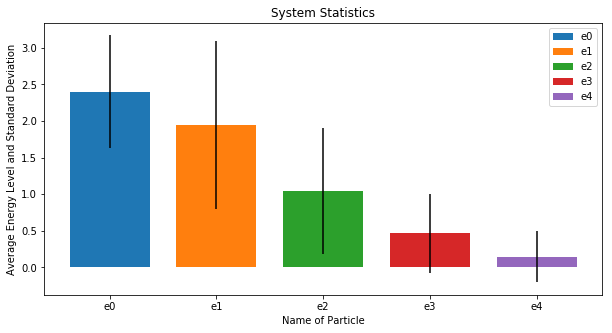

In [8]:
names = ['e0', 'e1', 'e2', 'e3', 'e4']
ind = np.arange(len(names))
width = 0.75

fig, ax = plt.subplots(figsize=(10,5))
for i, a, s, e in zip(ind, avg, std, names):
    r1 = ax.bar(i, a, width, 
                yerr=s, 
                label=e)

ax.set_ylabel('Average Energy Level and Standard Deviation')
ax.set_xlabel('Name of Particle')
ax.set_title('System Statistics')
ax.set_xticks(ind)
ax.set_xticklabels(names)
ax.legend()

5. Assuming that this system is Boltzmann, we estimate $\beta$. We do a linear fit to the log of our averages. A better analysis would include our uncertainty about each average.

\begin{equation}
    p_{i} \propto \exp{-\beta \epsilon_{i}}
\end{equation}

In [9]:
x = np.arange(len(avg))
y = scipy.special.softmax(avg)
_, m_beta = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
beta = -m_beta
print(x, y, sum(y))

[0 1 2 3 4] [0.46739104 0.29617645 0.12019476 0.06749037 0.04874738] 1.0


In [10]:
print(f"Out reported beta is: {beta}")

Out reported beta is: 0.7281586293723739


6. We repeat the experiments for N = 10, 100, 1000, 10000 particles simulated for about 10000 timesteps.

In [11]:
def sim_to_array(N, count_timesteps):
    aaa = simulate(N, count_timesteps)
    return np.asarray(aaa[1:]).T

def picture(avg, std, title):
    names = ['e0', 'e1', 'e2', 'e3', 'e4']
    ind = np.arange(len(names))
    width = 0.75

    fig, ax = plt.subplots(figsize=(10,5))
    for i, a, s, e in zip(ind, avg, std, names):
        r1 = ax.bar(i, a, width, 
                    yerr=s, 
                    label=e)

    ax.set_ylabel('Average Energy Level and Standard Deviation')
    ax.set_xlabel('Name of Particle')
    ax.set_title(title)
    ax.set_xticks(ind)
    ax.set_xticklabels(names)
    ax.legend()
    
def calc_beta(avg):
    x = np.arange(len(avg))
    y = scipy.special.softmax(avg)
    _, m_beta = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
    beta = -m_beta
#     print(x, y, sum(y))
    return beta

SYSTEM FOR N=10
Out reported beta is: 0.37552423668906193


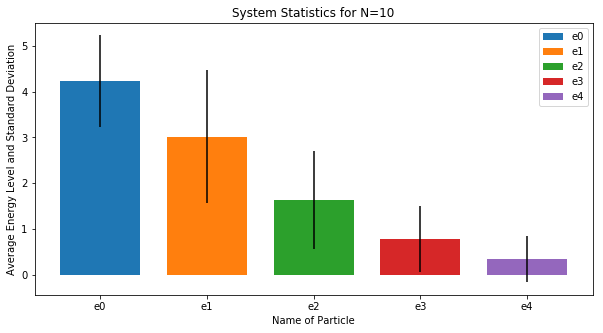

In [12]:
print('SYSTEM FOR N=10')
eN10 = sim_to_array(10, 10050)[50:]
avg = np.mean(eN10, axis=0)
std = np.std(eN10, axis=0)

picture(avg, std, 'System Statistics for N=10')

print(f"Out reported beta is: {calc_beta(avg)}")

SYSTEM FOR N=100
Out reported beta is: 2.526253972650338e-09


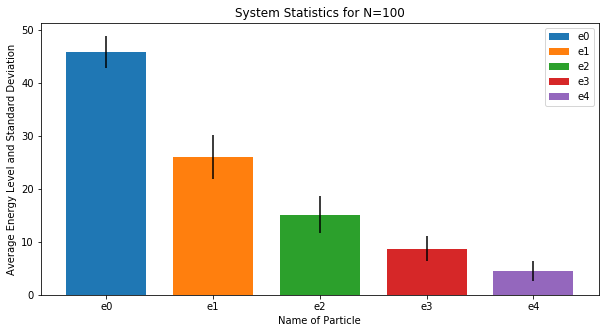

In [13]:
print('SYSTEM FOR N=100')
eN10 = sim_to_array(100, 10050)[50:]
avg = np.mean(eN10, axis=0)
std = np.std(eN10, axis=0)

picture(avg, std, 'System Statistics for N=100')

print(f"Out reported beta is: {calc_beta(avg)}")

SYSTEM FOR N=1000
Out reported beta is: 6.671208736957808e-93


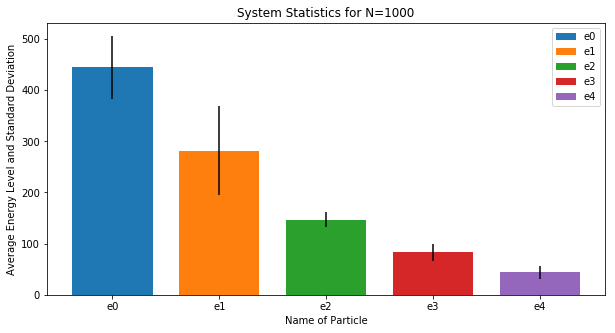

In [14]:
print('SYSTEM FOR N=1000')
eN10 = sim_to_array(1000, 10050)[50:]
avg = np.mean(eN10, axis=0)
std = np.std(eN10, axis=0)

picture(avg, std, 'System Statistics for N=1000')

print(f"Out reported beta is: {calc_beta(avg)}")

SYSTEM FOR N=10000
Out reported beta is: nan


/home/ben/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/home/ben/.local/lib/python3.7/site-packages/numpy/lib/polynomial.py:623: RuntimeWarning: invalid value encountered in multiply
  rhs *= w
/home/ben/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RankWarning: Polyfit may be poorly conditioned


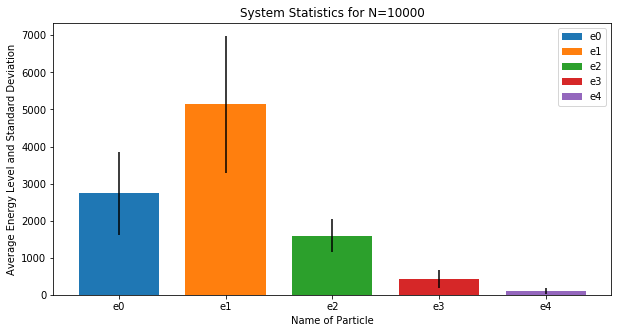

In [15]:
print('SYSTEM FOR N=10000')
eN10 = sim_to_array(10000, 10050)[50:]
avg = np.mean(eN10, axis=0)
std = np.std(eN10, axis=0)

picture(avg, std, 'System Statistics for N=10000')

print(f"Out reported beta is: {calc_beta(avg)}")

The main two results are that beta decreases with number of particles in the system and that in the last system the e1 energy level is more highly populated than the e0. This is the behavior I would expect in a system with the same number of particles, but increasing temperature. However, that might actually be what's going on here because of the limits on which energy levels are possible AND the transitions only occuring between two states probabilty means larger systems are at a higher temperatures.